# Graphs
-------------------------------------------------------------
>**Unidade curricular | Course Unit** Estrutura de Dados e Algoritmos | Data Structures and Algorithms
>
>**Professor** Luis Ramada Pereira
>
>**Curso|Course** LCD-PL -- **Ano letivo|Year** 2019/2020
>
>**Autor|Author** Joel Paula - nº 93393
>
>01-05-2020

This work is an exercise on implementing a graph in Python, using an adjacency list representation, implemented with dictionaries.

Our graph uses a dictionary which keys are all the vertices and which values are dictionaries themselves. Those dictionaries have an entry for each connected vertex, which value is the connecting edge.

Using the example graph:

![An example graph](ExampleGraph.svg "The graph example we are going to use from now on")

<style>
.mine {
  border-collapse: collapse;
}
.mine th, td {
  border: 1px solid;
}
.mine table {
  margin: 10px 10px 10px 10px;
}
.vertex {
  text-align:center; 
  vertical-align:middle; 
  font-style: italic; 
  font-family: serif; 
  font-size: 2.5em;
}
.edge {
  padding: 10px 10px 10px 10px;
  text-align:center; 
  vertical-align:middle; 
  font-style: italic; 
  font-family: serif; 
  font-size: 2.0em;
}
</style>
<table class="mine">
  <caption>Graph</caption>
  <tr><th>Key</br>(vertex)</th><th>Value</br>(edge dictionary)</th></tr>
  <tr>
    <td class="vertex">u</td>
    <td>
      <table class="mine">
        <tr>
          <th>Key</br>(vertex)</th>
          <th>Value</br>(edge)</th>
        </tr>
        <tr>
          <td class="vertex">v</td>
          <td><div class="edge">e</div> (u <--> v)</td>
        </tr>
        <tr>
          <td class="vertex">w</td>
          <td><div class="edge">g</div> (u <--> w)</td>
        </tr>
      </table>
    </td>
  </tr>
  <tr>
    <td class="vertex">v</td>
    <td>
      <table class="mine">
        <tr>
          <th>Key</br>(vertex)</th>
          <th>Value</br>(edge)</th>
        </tr>
        <tr>
          <td class="vertex">u</td>
          <td><div class="edge">e</div> (u <--> v)</td>
        </tr>
        <tr>
          <td class="vertex">w</td>
          <td><div class="edge">f</div> (v <--> w)</td>
        </tr>
      </table>
    </td>
  </tr>
  <tr>
    <td class="vertex">w</td>
    <td>
      <table class="mine">
        <tr>
          <th>Key</br>(vertex)</th>
          <th>Value</br>(edge)</th>
        </tr>
        <tr>
          <td class="vertex">u</td>
          <td><div class="edge">g</div> (u <--> w)</td>
        </tr>
        <tr>
          <td class="vertex">v</td>
          <td><div class="edge">f</div> (v <--> w)</td>
        </tr>
        <tr>
          <td class="vertex">z</td>
          <td><div class="edge">h</div> (w <--> z)</td>
        </tr>
      </table>
    </td>
  </tr>
  <tr>
    <td class="vertex">z</td>
    <td>
      <table class="mine">
        <tr>
          <th>Key</br>(vertex)</th>
          <th>Value</br>(edge)</th>
        </tr>
        <tr>
          <td class="vertex">w</td>
          <td><div class="edge">h</div> (w <--> z)</td>
        </tr>
      </table>
    </td>
  </tr>
</table>



## Vertex and Edge classes

Lets start by creating the basic classes that hold teh Vertex and the Edge:

In [134]:
class Vertex:
    def __init__(self, name=None):
        self.__name = name
        self.vertices = {}

    @property
    def name(self):
        return self.__name
    
    def __str__(self):
        return f"{self.__name}"

    def __repr__(self):
        return str(self)


In [135]:
class Edge:
    def __init__(self, origin, destination, directional=False, name=None):
        self.__name = name
        self.directional = directional
        self.__vertex = (origin, destination)
    
    @property
    def name(self):
        return self.__name
    
    @property
    def origin(self):
        return self.__vertex[0]

    @property
    def destination(self):
        return self.__vertex[1]

    def endpoints(self):
        return self.__vertex

    def opposite(self, v):
        return next(i for i in self.__vertex if i is not v)

    def __str__(self):
        return f"{self.__name}: ({self.__vertex[0].name} --{'>' if self.directional else ''} {self.__vertex[1].name})"
    
    def __repr__(self):
        return str(self)
        

### Basic `Vertex` and `Edge` tests

Now, lets do some tests and try the classes out.

In [136]:
# creating the Vertices
u = Vertex("u")
v = Vertex("v")
w = Vertex("w")
z = Vertex("z")

# testing the vertices
assert u.name == "u", "Vertex should keep their given name"

print("Vertex 'u':", u)
print("All Vertex tests passing, if we got up to here!")

# creating the edges
e = Edge(u, v, name="e")
f = Edge(v, w, name="f")
g = Edge(u, w, name="g")
h = Edge(w, z, name="h")

# testing the Edges
assert e.name == "e", "Edges should keep their given name"
assert e.origin is u, "Edges should keep the given origin vertex"
assert e.destination is v, "Edges should keep the given destination vertex"
assert e.opposite(v) is u, "Edges should return the opposite vertex"
assert e.opposite(u) is v, "Edges should return the opposite vertex"
assert len(e.endpoints()) == 2, "Edges should return the given number of endpoints"
assert u in e.endpoints(), "Edges should keep both given vertices"
assert v in e.endpoints(), "Edges should keep both given vertices"
assert f.destination is g.destination, "Edges should keep the vertices' references"

print("Edge 'e':",e)
print("All Edge tests passing, if we got up to here!")


Vertex 'u': u
All Vertex tests passing, if we got up to here!
Edge 'e': e: (u -- v)
All Edge tests passing, if we got up to here!


## The graph class

Next, it's time to create the Graph class. 

Remmeber we said we would be using a dictionary to hold the vertices, with each dictionary entry using the vertex as the key and a dictionary as a value. That dictionary will hold all the adjacent vertices and their incident edges.

We were also given a requirement to fulfil the following interface (which we will do):

|   Method signature    |   Description |
| ------------------    | ------------- |
| `vertex_count()` | Returns the number of vertices form the graph |
| `vertices()` | Returns an iterator over all vertices |
| `edge_count()` | Returns the number of edges on the graph |
| `edges()` | Returns an iterator over all edges on the graph |
| `get_edge(u, v)` | Returns the edge between vertex 'u' and vertex 'v', if it exists |
| `degree(v)` | Returns the degree (number of edges incident to it) |
| `insert_vertex(v)` | Updates the graph with vertex 'v' |
| `insert_edge(a)` | Updates the graph with edge 'a' |
| `remove_vertex(v)` | Removes vertex 'v' from the graph, along with all its incident edges |
| `remove_edge(e)` | Removes edge 'e' from the graph |


In [137]:
class Graph():
    def __init__(self):
        self.__vertices = {}
    
    def insert_vertex(self, v):
        self.__vertices[v] = {}

    def vertices(self):
        return self.__vertices.keys()

    def vertex_count(self):
        return len(self.__vertices)

    def insert_edge(self, e):
        self.__vertices[e.origin][e.destination] = e
        self.__vertices[e.destination][e.origin] = e

    def edges(self):
        return {edge for children in self.__vertices.values() for edge in children.values()}

    def edge_count(self):
        return len(self.edges())

    def get_edge(self, u, v):
        res = None
        if u in self.__vertices:
            if v in self.__vertices[u]:
                res = self.__vertices[u][v]
        return res

    def degree(self, v):
        # print(self.__vertices[v].keys())
        return len(self.__vertices[v].keys())

    def remove_vertex(self, v):
        # remove connections to this vertex
        for o in self.__vertices[v]:
            del self.__vertices[o][v]
        del self.__vertices[v]

    def remove_edge(self, e):
        del self.__vertices[e.origin][e.destination]
        del self.__vertices[e.destination][e.origin]


### Graph tests

Again, we should follow up by creating some tests. Let's start by creating the Graph and inserting all the vertices and the Edges into it:

In [138]:
gr = Graph()

gr.insert_vertex(u)
gr.insert_vertex(v)
gr.insert_vertex(w)
gr.insert_vertex(z)

print("the graph's vertices:", gr.vertices())
print("vertex count = ", gr.vertex_count())

gr.insert_edge(e)
gr.insert_edge(f)
gr.insert_edge(g)
gr.insert_edge(h)

print("the graph's edges:", gr.edges())
print("edge count = ", gr.edge_count())


the graph's vertices: dict_keys([u, v, w, z])
vertex count =  4
the graph's edges: {e: (u -- v), f: (v -- w), h: (w -- z), g: (u -- w)}
edge count =  4


Now, let's follow up by testing the graph. Remember, we are not testing its inner workings, we are only testing its interface. If it does what it "says" it does, however it does, it is working. That allows for future improvements of our graph class implementation, as long as it keeps the same interface.

Let's start by checking that the vertices are all really there:

In [139]:
assert gr.vertex_count() == 4, f"Graph should count all vertices inserted. Inserted 4, but got back '{gr.vertex_count()}'"
assert u in gr.vertices(), "Graph should hold on to all the inserted vertices - vertex 'u' is not found"
assert v in gr.vertices(), "Graph should hold on to all the inserted vertices - vertex 'v' is not found"
assert w in gr.vertices(), "Graph should hold on to all the inserted vertices - vertex 'w' is not found"
assert z in gr.vertices(), "Graph should hold on to all the inserted vertices - vertex 'z' is not found"

print("All graph's vertex are there")

All graph's vertex are there


Now test that all edges are there:

In [140]:
assert gr.edge_count() == 4, f"Graph should count all inserted edges - 4, but it's showing only '{gr.edge_count()}''"
assert e in gr.edges(), "Graph should contain all inserted edges - edge 'e' is not found"
assert f in gr.edges(), "Graph should contain all inserted edges - edge 'f' is not found"
assert g in gr.edges(), "Graph should contain all inserted edges - edge 'g' is not found"
assert h in gr.edges(), "Graph should contain all inserted edges - edge 'h' is not found"

print("All graph's edges are there")

All graph's edges are there


Next, we want to test that the vertex degree is properly calculated:

In [141]:
assert gr.degree(u) == 2, f"Graph degree count wrong - should be 2 and is '{gr.degree(u)}'"
assert gr.degree(z) == 1, f"Graph degree count wrong - should be 1 and is '{gr.degree(z)}'"
assert gr.degree(w) == 3, f"Graph degree count wrong - should be 2 and is '{gr.degree(w)}'"
print("Graph degree(v) operation tested ok")


Graph degree(v) operation tested ok


Next, test that the edges are properly stored, as incident to both vertices:

In [142]:
assert gr.get_edge(w, u) is g, f"Graph should have the incident edge 'g' to vectors 'u' and 'w'"
assert gr.get_edge(u, w) is g, f"Graph should have the incident edge 'g' to vectors 'w' and 'u'"
assert gr.get_edge(z, w) is h, f"Graph should have the incident edge 'h' to vectors 'z' and 'w'"
assert gr.get_edge(w, z) is h, f"Graph should have the incident edge 'h' to vectors 'w' and 'z'"
assert gr.get_edge(v, w) is f, f"Graph should have the incident edge 'f' to vectors 'v' and 'w'"
assert gr.get_edge(w, v) is f, f"Graph should have the incident edge 'f' to vectors 'w' and 'v'"
assert gr.get_edge(v, u) is e, f"Graph should have the incident edge 'e' to vectors 'v' and 'u'"
assert gr.get_edge(u, v) is e, f"Graph should have the incident edge 'e' to vectors 'u' and 'v'"
print("Edges are correctly found independent of the order of their incident vertices")

Edges are correctly found independent of the order of their incident vertices


Next, we are trying out the remove methods. First we test that the removal of a vertex works and that it also removes all the incident edges to it. Then, we also test that an edge removal works. 

In [143]:
gr.remove_vertex(w)
assert w not in gr.vertices(), "Removed vertex 'w', so it shouldn't still be in the graph"
assert gr.get_edge(z, w) is None, "edges for removed vertex should not be returned by get_edge()"
assert gr.get_edge(v, w) is None, "edges for removed vertex should not be returned by get_edge()"
assert gr.get_edge(u, w) is None, "edges for removed vertex should not be returned by get_edge()"
assert f not in gr.edges(), "edges for removed vertex should not be returned by get_edge()"
assert g not in gr.edges(), "edges for removed vertex should not be returned by get_edge()"
assert h not in gr.edges(), "edges for removed vertex should not be returned by get_edge()"
assert e in gr.edges(), "edges not removed, should still be on the graph"

gr.remove_edge(e)
assert e not in gr.edges(), "Removed edges should not be available at the graph"
assert gr.get_edge(u, v) is None, "Removed edge 'e' was removed but still shows as the incident edge to 'u' a 'v' vertices"

print("All remove tests passed")

All remove tests passed


# Using the Graph classes

We want to use the Graph and its classes as the basis for an exercise with underground train stations an their lines.

## Train station classes

The train station class will derive from the Vertex, adding the station's id and gps coordinates to its existing properties.


In [144]:
class Station(Vertex):
    def __init__(self, id, name, latitude, longitude):
        super().__init__(name=name)
        self.__id = id
        self.__latitude = latitude
        self.__longitude = longitude
    
    @property
    def id(self):
        return self.__id

    @property
    def latitude(self):
        return self.__latitude

    @property
    def longitude(self):
        return self.__longitude

    def __str__(self):
        return f"[{self.id}] {self.name} ({self.latitude}, {self.longitude})"

    def __repr__(self):
        return str(self)


# Edge_line class

The lines connecting the train stations will be represented by an `Edge_line` class, which derives from the Edge class but aditionally contains the name of the line (remember underground train lines usually have a name to help underground users).


In [145]:
class Edge_line(Edge):
    def __init__(self, origin, destination, line):
        super().__init__(origin=origin, destination=destination)
        self.__line = line
    
    @property
    def line(self):
        return self.__line
    
    def __str__(self):
        return f"{self.origin.name} <--> {self.destination.name} - {self.line}"

    def __repr__(self):
        return str(self)


## Creating stations and connecting lines

We are now going to use a set of csv files containing the list of train stations and of connecting lines for the Lisbon "Metro" network.

The content of `lisbon.stations.csv`:

In [146]:
import pandas as pd
df_stations = pd.read_csv("lisbon.stations.csv", encoding="cp1252")
df_stations


,id,latitude,longitude,name
0,1,38.771746,-9.130621,Aeroporto
1,2,38.775867,-9.117719,Encarnação
2,3,38.775383,-9.104897,Moscavide
3,4,38.770726,-9.101477,Oriente
4,5,38.764569,-9.106464,Cabo Ruivo
5,6,38.761624,-9.112163,Olivais
6,7,38.755357,-9.113954,Chelas
7,8,38.747860,-9.118439,Bela Vista
8,9,38.739911,-9.123824,Olaias
9,10,38.737158,-9.133888,Alameda


The encoding `cp1252` appears because the csv file has the Windows-1252 (Western Europe), instead of the standard UTF-8 encoding.

Let's move on to creating the stations from the file:


In [147]:
train_stations = {}
for ts in df_stations.itertuples():
    s = Station(id=ts.id, name=ts.name, latitude=ts.latitude, longitude=ts.longitude)
    train_stations[s.id] = s

print(train_stations)

{1: [1] Aeroporto (38.771746, -9.1306207), 2: [2] Encarnação (38.7758674, -9.1177189), 3: [3] Moscavide (38.775383000000005, -9.1048967), 4: [4] Oriente (38.770726, -9.1014767), 5: [5] Cabo Ruivo (38.764569, -9.106463699999999), 6: [6] Olivais (38.761624, -9.112163), 7: [7] Chelas (38.755357000000004, -9.113954), 8: [8] Bela Vista (38.747859999999996, -9.118439), 9: [9] Olaias (38.739911, -9.123824), 10: [10] Alameda (38.737158, -9.133888), 11: [11] Saldanha (38.735426000000004, -9.145261), 12: [12] São Sebastião (38.734815000000005, -9.15422), 13: [13] Santa Apolónia (38.713814, -9.12257), 14: [14] Terreiro do Paço (38.707175, -9.133352), 15: [15] Chiado (38.710556, -9.139444000000001), 16: [16] Restauradores (38.715, -9.141389), 17: [17] Avenida (38.720109, -9.145883), 18: [18] Marquês de Pombal (38.725357, -9.150099), 19: [19] Parque (38.729726, -9.150335), 20: [20] Praça de Espanha (38.737849, -9.158458), 21: [21] Jardim Zoologico (38.742028999999995, -9.168977), 22: [22] Laranjeir

Now, to create the edge lines, we need to read the csv file `lisbon.connections.csv`:

In [148]:
df_lines = pd.read_csv("lisbon.connections.csv", encoding="cp1252")
df_lines

,station1,station2,line
0,1,2,1
1,2,3,1
2,3,4,1
3,4,5,1
4,5,6,1
5,6,7,1
6,7,8,1
7,8,9,1
8,9,10,1
9,10,11,1


We now have the file, let's use it to create the list of edges:

In [153]:
lines = []
for ln in df_lines.itertuples():
    # if ln.station1 in train_stations and ln.station2 in train_stations:
    lines.append(Edge_line(train_stations[ln.station1], train_stations[ln.station2], ln.line))

print(lines)

[Aeroporto <--> Encarnação - 1, Encarnação <--> Moscavide - 1, Moscavide <--> Oriente - 1, Oriente <--> Cabo Ruivo - 1, Cabo Ruivo <--> Olivais - 1, Olivais <--> Chelas - 1, Chelas <--> Bela Vista - 1, Bela Vista <--> Olaias - 1, Olaias <--> Alameda - 1, Alameda <--> Saldanha - 1, Saldanha <--> São Sebastião - 1, Santa Apolónia <--> Terreiro do Paço - 2, Terreiro do Paço <--> Chiado - 2, Chiado <--> Restauradores - 2, Restauradores <--> Avenida - 2, Avenida <--> Marquês de Pombal - 2, Marquês de Pombal <--> Parque - 2, Parque <--> São Sebastião - 2, São Sebastião <--> Praça de Espanha - 2, Praça de Espanha <--> Jardim Zoologico - 2, Jardim Zoologico <--> Laranjeiras - 2, Laranjeiras <--> Alto dos Moinhos - 2, Alto dos Moinhos <--> Colégio Militar - 2, Colégio Militar <--> Carnide - 2, Carnide <--> Pontinha - 2, Pontinha <--> Alfornelos - 2, Alfornelos <--> Amadora Este - 2, Amadora Este <--> Reboleira - 2, Cais do Sodré <--> Chiado - 3, Chiado <--> Rossio - 3, Rossio <--> Martim Moniz 

Now, let's setup the Graph with the vertices (stations) and the edges (lines) we created before:

In [154]:
gr = Graph()

for st in train_stations:
    gr.insert_vertex(train_stations[st])

for el in lines:
    gr.insert_edge(el)

print("Vertices: ", gr.vertex_count())
print("Edges: ", gr.edge_count())


Vertices:  50
Edges:  52


## Visualizing the underground network graph

We will now use the matplotlib pyplot module to visualize the underground network:

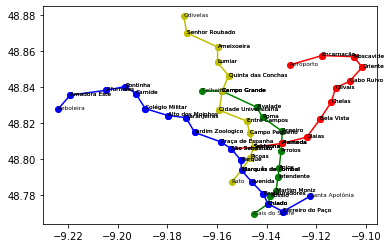

In [155]:
import matplotlib.pyplot as plt

def plot_graph(g):
    colors = {}
    # read the line to color table
    df_colors = pd.read_csv("lisbon.lines.csv", encoding="cp1252")
    for cl in df_colors.itertuples():
        colors[cl.line] = cl.colour

    fig = plt.figure()

    for e in g.edges():
        xs = [e.origin.longitude, e.destination.longitude]
        ys = [e.origin.latitude*1.26, e.destination.latitude*1.26]
        ls = [e.origin.name, e.destination.name]
        plt.plot(xs, ys, c=colors[e.line], marker='o')
        # Labels
        plt.annotate(ls[0], (xs[0], ys[0]), size='xx-small')
        plt.annotate(ls[1], (xs[1], ys[1]), size='xx-small')

    plt.show()

plot_graph(gr)

That's all folks! Hope you enjoyed it.